In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS_forpatient = df_ROS[['성별', '신장','심혈관질환', '체중','흡연여부','연령','직업','혈액형','재발여부']]

In [9]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


#### 데이터 전처리 
- 데이터의 갯수가 맞아야 함 
- 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려

In [8]:
# df_ROS_forpatient.isnull().sum() # null의 유무 확인 및 null값 삭제
df_ROS_forpatient= df_ROS_forpatient.dropna()
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인 
- 목표 변수 : '재발여부' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인 
- 설명 변수 : 
    - '성별' : 남성 발생률이 높은 것 같음.
    - '신장' : 목표변수 대비 분포 변화 적음.
    - '심혈관질환' : 질환자는 재발율이 상대적으로 높음.
    - '체중' : 몸무게 차이 따라 분포 변화 영향 있음.
    - '흡연여부' : 흡엽자는 재발율 상대적으로 높음.
    - '연령' : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.
    - '직업': 건설업/수산업자 분들의 발생률이 상대적으로 높음.
    - '혈액형' : 차이에 여부 확인 필요(확증데이터 분석)
- 분석 story : 재발 방지를 줄이기 위해서는 흡연을 피하고, 체중을 줄이는것이 우선임

#### 데이터 타입과 분포  
- 목표 변수 확인 rf) 대부분이 범주형(예측이 높아야하기떄문)

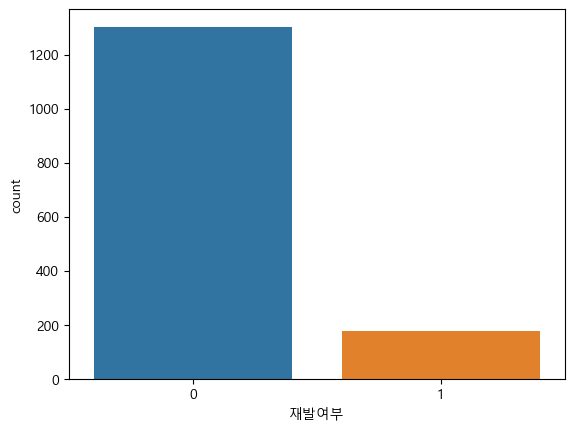

In [10]:
sns.countplot(data=df_ROS_forpatient, x='재발여부')
plt.show()

In [11]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


#### object로 변환 대상 : 성별, 심혈관질환, 흡연여부, 재발여부

In [12]:
df_ROS_forpatient['심혈관질환'].value_counts() 

0    1423
1      56
Name: 심혈관질환, dtype: int64

In [16]:
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object) # 데이터 변환

In [17]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [22]:
forpatient_list= df_ROS_forpatient.describe().columns.to_list() # 연속형 확인
forpatient_list

['신장', '체중', '연령']

#### X: 연속형 / Y : 범주형

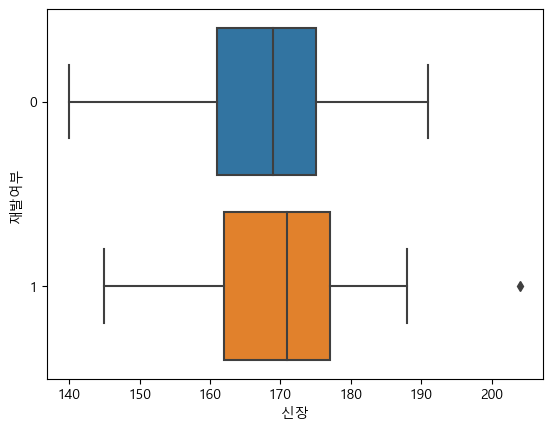

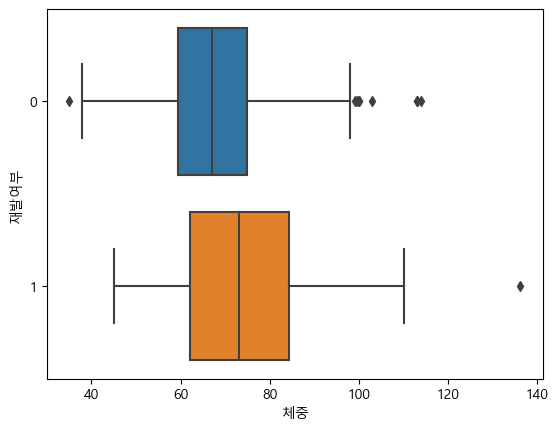

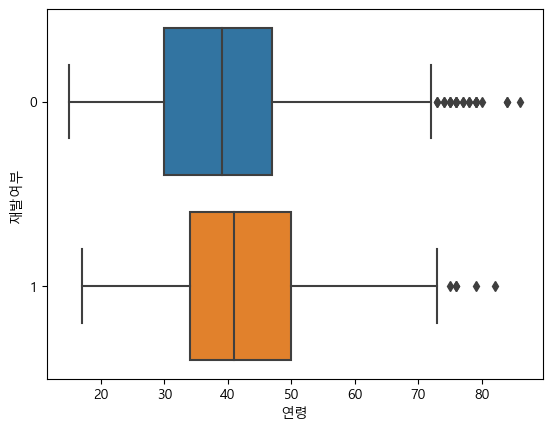

In [38]:
# for문으로 그래프 그리기
for item in forpatient_list :
    sns.boxplot(data=df_ROS_forpatient, x=item, y='재발여부', orient='h') # orient='h'목표변수 y에 위치하게끔
    plt.show()

####  X : 범주형 / Y : 범주형 

In [31]:
# df_ROS_forpatient.describe(include=object) # 범주형 확인 
# df_ROS_forpatient.drop(columns=['재발여부']) # drop
forpatient_object_list= df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_object_list
# 재발여부는 목표변수여서 그래프 안그려도 되기때문에 drop

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

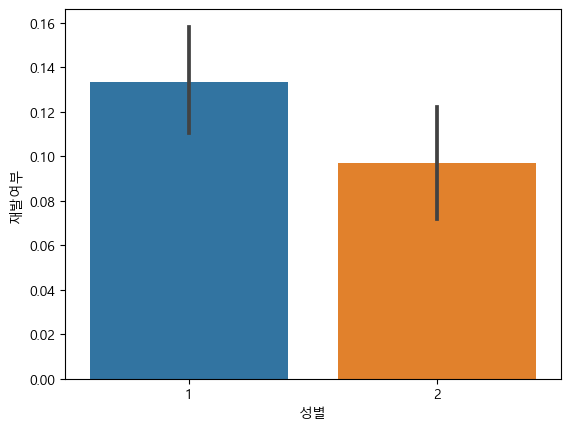

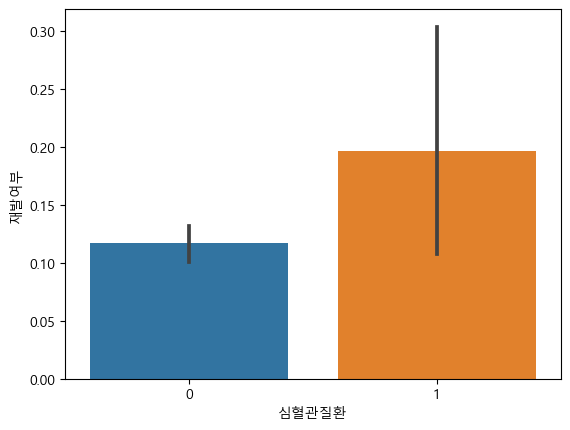

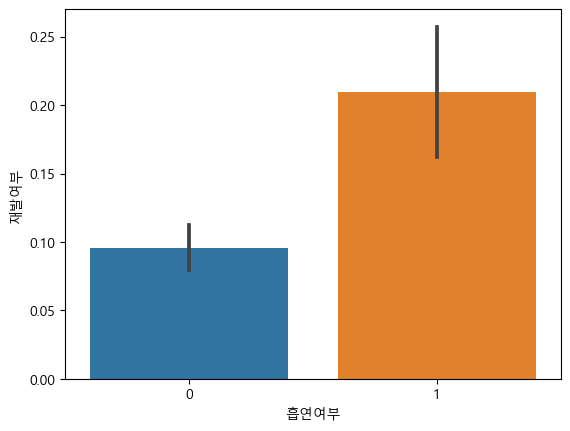

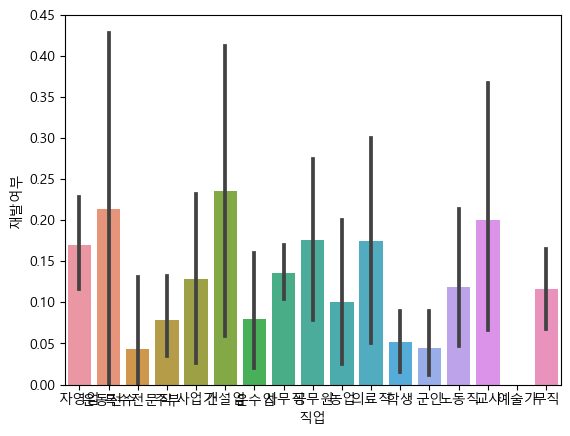

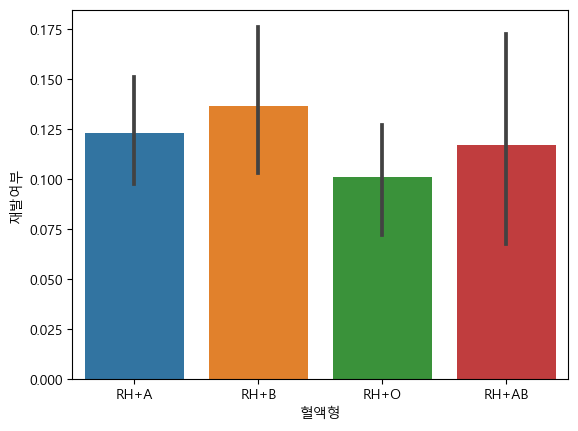

In [36]:
for item in forpatient_object_list :
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()